In [ ]:
#installing Kaggle
!pip install kaggle


In [ ]:
#downloading kaggle dataset for cherry leaves
!kaggle datasets download -d codeinstitute/cherry-leaves


In [ ]:
#unzipping the file
import zipfile

with zipfile.ZipFile("cherry-leaves.zip", "r") as zip_ref:
    zip_ref.extractall("cherry-leaves")


In [ ]:
import os
cwd = os.getcwd()
print("Current working directory:", cwd)


In [ ]:
#resizing the image file
from PIL import Image
import os

# Define directory paths
dataset_dirs = ["./cherry-leaves/cherry-leaves-folder/healthy", "./cherry-leaves/cherry-leaves-folder/powdery_mildew"]
output_dir = "./clean_data"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to resize images and save them
def resize_and_save_image(image_path, output_path, new_size=(50, 50)):
    # Load image
    image = Image.open(image_path)
    
    # Resize image
    resized_image = image.resize(new_size)
    
    # Save resized image
    resized_image.save(output_path)

# Iterate through dataset directories
for dataset_dir in dataset_dirs:
    # Get category name from directory
    category = os.path.basename(dataset_dir)
    
    # Output directory for the current category
    output_category_dir = os.path.join(output_dir, category)
    os.makedirs(output_category_dir, exist_ok=True)
    
    # Iterate through files in the dataset directory
    for file in os.listdir(dataset_dir):
        if file.lower().endswith((".jpeg", ".jpg")):
            # Input and output paths
            input_path = os.path.join(dataset_dir, file)
            output_path = os.path.join(output_category_dir, file)
            
            # Resize image and save
            resize_and_save_image(input_path, output_path)


In [ ]:
pip install Pillow


In [5]:
#split dataset to training, validation and test sets
import os
import shutil
import random

# Define directories
clean_data_dir_healthy = './clean_data/healthy/'
clean_data_dir_mildew = './clean_data/powdery_mildew/'
train_dir = './data_split/train/'
val_dir = './data_split/validation/'
test_dir = './data_split/test/'

# Create directories if they don't exist
os.makedirs(train_dir + 'healthy/', exist_ok=True)
os.makedirs(train_dir + 'powdery_mildew/', exist_ok=True)
os.makedirs(val_dir + 'healthy/', exist_ok=True)
os.makedirs(val_dir + 'powdery_mildew/', exist_ok=True)
os.makedirs(test_dir + 'healthy/', exist_ok=True)
os.makedirs(test_dir + 'powdery_mildew/', exist_ok=True)

# Function to split images into training, validation, and test sets
def split_images(images, train_size, val_size, test_size):
    random.shuffle(images)  # Shuffle the list randomly
    train_images = images[:train_size]
    val_images = images[train_size:train_size + val_size]
    test_images = images[train_size + val_size:]
    return train_images, val_images, test_images

# List all the images in the clean_data directories
all_images_healthy = os.listdir(clean_data_dir_healthy)
all_images_mildew = os.listdir(clean_data_dir_mildew)

# Calculate the size of each set
total_size_healthy = len(all_images_healthy)
total_size_mildew = len(all_images_mildew)
total_size = min(total_size_healthy, total_size_mildew)

train_size = total_size // 3  # 1/3 for training
val_size = total_size // 3  # 1/3 for validation
test_size = total_size - train_size - val_size  # Remaining for testing

# Split images for healthy leaves
train_images_healthy, val_images_healthy, test_images_healthy = split_images(all_images_healthy, train_size, val_size, test_size)

# Split images for powdery mildew leaves
train_images_mildew, val_images_mildew, test_images_mildew = split_images(all_images_mildew, train_size, val_size, test_size)

# Move images to their respective directories
for image in train_images_healthy:
    shutil.move(os.path.join(clean_data_dir_healthy, image), os.path.join(train_dir + 'healthy/', image))

for image in val_images_healthy:
    shutil.move(os.path.join(clean_data_dir_healthy, image), os.path.join(val_dir + 'healthy/', image))

for image in test_images_healthy:
    shutil.move(os.path.join(clean_data_dir_healthy, image), os.path.join(test_dir + 'healthy/', image))

for image in train_images_mildew:
    shutil.move(os.path.join(clean_data_dir_mildew, image), os.path.join(train_dir + 'powdery_mildew/', image))

for image in val_images_mildew:
    shutil.move(os.path.join(clean_data_dir_mildew, image), os.path.join(val_dir + 'powdery_mildew/', image))

for image in test_images_mildew:
    shutil.move(os.path.join(clean_data_dir_mildew, image), os.path.join(test_dir + 'powdery_mildew/', image))

print("Dataset split into training, validation, and test sets successfully!")


Dataset split into training, validation, and test sets successfully!


In [7]:
pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 116.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 127.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 30.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Summary:
Healthy Leaves - Mean: [137.85684679 143.78662425 120.87031897]  Standard Deviation: [51.66489044 34.80282996 51.93495327]
Powdery Mildew Leaves - Mean: [115.86571355 122.8861204  103.11079315]  Standard Deviation: [36.25081573 33.6141598  41.73180473]


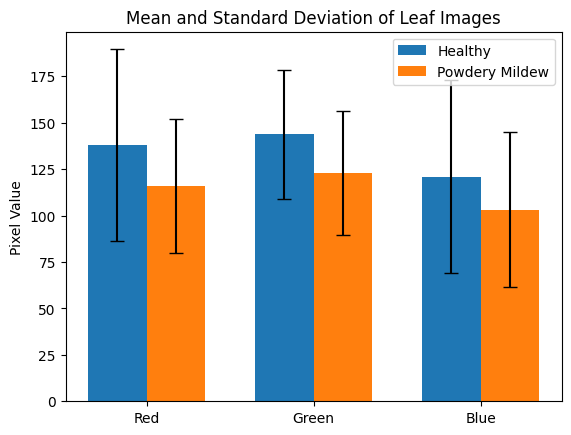

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to calculate mean and standard deviation of a set of images
def calculate_stats(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        images.append(img)
    images = np.array(images)
    mean = np.mean(images, axis=(0, 1, 2))
    std = np.std(images, axis=(0, 1, 2))
    return mean, std

# Paths to folders containing images
healthy_folder = './data_split/train/healthy'
mildew_folder = './data_split/train/powdery_mildew'

# Calculate statistics for healthy leaves
healthy_mean, healthy_std = calculate_stats(healthy_folder)

# Calculate statistics for powdery mildew leaves
mildew_mean, mildew_std = calculate_stats(mildew_folder)

# Plotting
labels = ['Red', 'Green', 'Blue']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, healthy_mean, width, label='Healthy', yerr=healthy_std, capsize=5)
rects2 = ax.bar(x + width/2, mildew_mean, width, label='Powdery Mildew', yerr=mildew_std, capsize=5)

ax.set_ylabel('Pixel Value')
ax.set_title('Mean and Standard Deviation of Leaf Images')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Print summary
print("Summary:")
print("Healthy Leaves - Mean:", healthy_mean, " Standard Deviation:", healthy_std)
print("Powdery Mildew Leaves - Mean:", mildew_mean, " Standard Deviation:", mildew_std)

plt.show()


In [2]:
pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 37.0 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
sudo apt-get install libgl1-mesa-glx


In [ ]:
import os
import cv2

# Function to create an image montage
def create_montage(images, titles, rows, cols):
    montage = None
    idx = 0
    for i in range(rows):
        row_images = []
        for j in range(cols):
            if idx < len(images):
                img = cv2.resize(images[idx], (300, 300))  # Resize images for montage
                cv2.putText(img, titles[idx], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
                row_images.append(img)
                idx += 1
            else:
                # Add blank image if no more images to display
                row_images.append(np.zeros((300, 300, 3), dtype=np.uint8))
        row_montage = cv2.hconcat(row_images)
        if montage is None:
            montage = row_montage
        else:
            montage = cv2.vconcat([montage, row_montage])
    return montage

# Paths to folders containing images
healthy_folder = './data_split/train/healthy'
mildew_folder = './data_split/train/powdery_mildew'

# Load images
healthy_images = [cv2.imread(os.path.join(healthy_folder, filename)) for filename in os.listdir(healthy_folder)[:3]]
mildew_images = [cv2.imread(os.path.join(mildew_folder, filename)) for filename in os.listdir(mildew_folder)[:3]]

# Title for images
healthy_titles = ['Healthy Leaf'] * len(healthy_images)
mildew_titles = ['Powdery Mildew Leaf'] * len(mildew_images)

# Create montage
montage = create_montage(healthy_images + mildew_images, healthy_titles + mildew_titles, 2, 3)

# Display montage
cv2.imshow('Leaf Montage', montage)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
import os
import cv2

# Function to classify leaves as healthy or powdery mildew
def classify_leaf(image, mean_values, std_values):
    # Calculate mean and standard deviation of the image
    mean_image = cv2.mean(image)
    std_image = cv2.meanStdDev(image)

    # Compare mean and standard deviation with threshold values
    is_healthy = True
    for i in range(3):  # Iterate over RGB channels
        if (mean_image[i] < mean_values[i] - std_values[i]) or \
           (mean_image[i] > mean_values[i] + std_values[i]):
            is_healthy = False
            break

    return is_healthy

# Paths to folders containing images
healthy_folder = './data_split/train/healthy'
mildew_folder = './data_split/train/powdery_mildew'

# Load images
healthy_images = [cv2.imread(os.path.join(healthy_folder, filename)) for filename in os.listdir(healthy_folder)[:3]]
mildew_images = [cv2.imread(os.path.join(mildew_folder, filename)) for filename in os.listdir(mildew_folder)[:3]]

# Title for images
healthy_titles = ['Healthy Leaf'] * len(healthy_images)
mildew_titles = ['Powdery Mildew Leaf'] * len(mildew_images)

# Mean and standard deviation values as thresholds
mean_values = [115.87, 122.89, 103.11]
std_values = [36.25, 33.61, 41.73]

# Classify images
healthy_classified = [classify_leaf(image, mean_values, std_values) for image in healthy_images]
mildew_classified = [classify_leaf(image, mean_values, std_values) for image in mildew_images]

# Display classification results
print("Healthy Leaves:")
for i, is_healthy in enumerate(healthy_classified):
    print(f"Image {i+1}: {'Healthy' if is_healthy else 'Powdery Mildew'}")

print("\nPowdery Mildew Leaves:")
for i, is_healthy in enumerate(mildew_classified):
    print(f"Image {i+1}: {'Healthy' if is_healthy else 'Powdery Mildew'}")


Healthy Leaves:
Image 1: Powdery Mildew
Image 2: Healthy
Image 3: Powdery Mildew

Powdery Mildew Leaves:
Image 1: Healthy
Image 2: Healthy
Image 3: Healthy
